<div class="alert alert-info">
    <center> 
        <h1> Players stats </h1> 
    </center>
</div>

<h1> Libraries </h1>

In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import operator
import numpy as np
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

<h1> Files </h1>

In [2]:
regular_season = pd.read_csv("Data_regular_season.csv")
regular_season = regular_season.set_index('Player')
playoffs = pd.read_csv("Data_playoffs.csv")
playoffs = playoffs.set_index('Player')

playoffs.head(5)

,Points,Assists,Rebounds,Steals,Blocks,Primary Position
Player,,,,,,
LeBron,7491,1871,2348,445,250,3
MJ,5987,1022,1152,376,158,2
Kareem,5762,767,2481,189,476,5
Kobe,5640,1040,1119,310,144,2
Karl_Malone,4761,610,2062,258,135,4


<h2> Totals : </h2>

In [3]:
totals = regular_season + playoffs
totals["Primary Position"] = np.int64(totals["Primary Position"]*0.5)
totals.head()

,Points,Assists,Rebounds,Steals,Blocks,Primary Position
Player,,,,,,
LeBron,41732,11217,11753,2460,1207,3
MJ,38279,6655,7824,2320,1051,2
Kareem,44149,6427,19921,1349,3665,5
Kobe,39283,7346,8166,2254,784,2
Karl_Malone,41689,5858,17030,2343,1280,4


<h2> Function: create Heatmap </h2>

In [4]:
def create_heatmap(totals, size=(10,5), annotations=True):
    correlation_matrix = totals.corr()
   
    plt.figure(figsize=size)
    color_palette = sns.color_palette("light:#4d91ff", as_cmap=True)
    ax = sns.heatmap(data=correlation_matrix, cmap=color_palette, annot=annotations)
    plt.title("Heatmap: correlation matrix")

    plt.show()

<h2> Heatmap </h2>

In [5]:
heatmap_button = widgets.Button(
    description="Show heatmap",
    button_style="info"
)

heatmap_show_annotations = widgets.Checkbox(
    value=True,
    description="Show annotations"
)

heatmap_width = widgets.IntSlider(
    value=10,
    min=5,
    max=10,
    description="Width"
)

heatmap_height = widgets.IntSlider(
    value=5, 
    min=5,
    max=10,
    description="Height"
)

heatmap_output = widgets.Output()

In [6]:
@heatmap_button.on_click
def on_click(self): 
    heatmap_output.clear_output()
    annot = heatmap_show_annotations.value
    figsize = (heatmap_width.value,heatmap_height.value)
    with heatmap_output:
        create_heatmap(totals, size=figsize,annotations=annot)

In [7]:
display(heatmap_show_annotations, heatmap_width, heatmap_height, heatmap_button, heatmap_output)

Checkbox(value=True, description='Show annotations')

IntSlider(value=10, description='Width', max=10, min=5)

IntSlider(value=5, description='Height', max=10, min=5)

Button(button_style='info', description='Show heatmap', style=ButtonStyle())

Output()

<h1> Stats grouped by position </h1>

<h2> Point guards </h2>

In [8]:
point_guards = totals[totals["Primary Position"]==1]
point_guards.head(3)

,Points,Assists,Rebounds,Steals,Blocks,Primary Position
Player,,,,,,
Magic,21408,12487,8024,2082,438,1
Stockton,22147,17645,4659,3603,365,1
Robertson,28620,10656,8382,92,8,1


<h2> Shooting guards </h2>

In [9]:
shooting_guards = totals[totals["Primary Position"] == 2]
shooting_guards.head(3)

,Points,Assists,Rebounds,Steals,Blocks,Primary Position
Player,,,,,,
MJ,38279,6655,7824,2320,1051,2
Kobe,39283,7346,8166,2254,784,2
Dwyane_Wade,27119,6571,5861,1893,1060,2


<h2> Small forwards </h2>

In [10]:
small_forwards = totals[totals["Primary Position"] == 3]
small_forwards.head(3)

,Points,Assists,Rebounds,Steals,Blocks,Primary Position
Player,,,,,,
LeBron,41732,11217,11753,2460,1207,3
Paul_Pierce,29577,5287,8512,1956,850,3
Dominique_Wikins,28091,2820,7544,1451,677,3


<h2> Power forwards </h2>

In [11]:
power_forwards = totals[totals["Primary Position"] == 4]
power_forwards.head(3)

,Points,Assists,Rebounds,Steals,Blocks,Primary Position
Player,,,,,,
Karl_Malone,41689,5858,17030,2343,1280,4
Duncan,31668,4989,17950,1193,3588,4
Dirk,35223,4011,12935,1359,1410,4


<h2> Centers </h2>

In [12]:
centers = totals[totals["Primary Position"] == 5]
centers.head(3)

,Points,Assists,Rebounds,Steals,Blocks,Primary Position
Player,,,,,,
Kareem,44149,6427,19921,1349,3665,5
Wilt,35026,5316,27837,0,0,5
Shaq,33846,3608,15607,856,3191,5


<h3> Operations : points </h3>

In [13]:
def getTotalPoints(size=(5,15)):
    t = totals["Points"].sort_values(ascending=False)
    plt.figure(figsize=size)
    t.plot.bar()
    plt.show()
    return t

def displayPoints():
    ordered = totals.sort_values(by="Points",ascending=False) 
    size = ordered.shape[0]
    for i in range(size):
        print(f' {i+1} - {ordered.index[i]} :  {ordered["Points"][i]}')

<center class="alert alert-info">
    <h1> Stats: points </h1>
</center>

In [14]:
points_button = widgets.Button(
    description="Show points",
    button_style="info"
)

points_width = widgets.IntSlider(
    description="Width",
    value=20,
    min=5,
    max=20,
)

points_height = widgets.IntSlider(
    description="Height",
    value=5,
    min=5,
    max=15
)

points_output = widgets.Output()

In [15]:
total_points = ()

@points_button.on_click
def on_click(self):
    points_output.clear_output()
    size=(points_width.value, points_height.value)
    with points_output:
        globals()["total_points"] = getTotalPoints(size=size)
        displayPoints()

In [16]:
display(points_width, points_height, points_button, points_output)

IntSlider(value=20, description='Width', max=20, min=5)

IntSlider(value=5, description='Height', max=15, min=5)

Button(button_style='info', description='Show points', style=ButtonStyle())

Output()

<h3> Operations: assists </h3>

In [22]:
def getTotalAssists(size=(5,15)):
    t = totals["Assists"].sort_values(ascending=False)
    plt.figure(figsize=size)
    t.plot.bar()
    plt.show()
    return t

def displayAssists():
    ordered = totals.sort_values(by="Assists",ascending=False) 
    size = ordered.shape[0]
    for i in range(size):
        print(f' {i+1} - {ordered.index[i]} :  {ordered["Assists"][i]}')

<center class="alert alert-info">
    <h1> Stats: assists </h1>
</center>

In [19]:
assists_button = widgets.Button(
    description="Show total assists",
    button_style="info"
)

assists_width = widgets.IntSlider(
    description="Width",
    value=20,
    min=5,
    max=20
) 

assists_height = widgets.IntSlider(
    description="Height",
    value=5,
    min=5,
    max=15
)

assists_output = widgets.Output()

In [20]:
total_assists = ()

@assists_button.on_click
def on_click(self):
    assists_output.clear_output()
    size=(assists_width.value, assists_height.value)
    with assists_output:
        globals()["total_assists"] = getTotalAssists(size=size)
        displayAssists()

In [23]:
display(assists_width, assists_height, assists_button, assists_output)

IntSlider(value=20, description='Width', max=20, min=5)

IntSlider(value=5, description='Height', max=15, min=5)

Button(button_style='info', description='Show total assists', style=ButtonStyle())

Output(outputs=({'traceback': ['\x1b--------------------------------------------------------------------…

<h2> Operations: rebounds </h2>

In [15]:
def getTotalRebounds():
    t = totals["Rebounds"].sort_values(ascending=False)
    plt.figure(figsize=[15,15])
    t.plot.bar()
    plt.show()
    return t

def displayRebounds():
    ordered = totals.sort_values(by="Rebounds",ascending=False) 
    size = ordered.shape[0]
    for i in range(size):
        print(f' {i+1} - {ordered.index[i]} :  {ordered["Rebounds"][i]}')

<center class="alert alert-info">
    <h1> Stats: rebounds </h1>
</center>

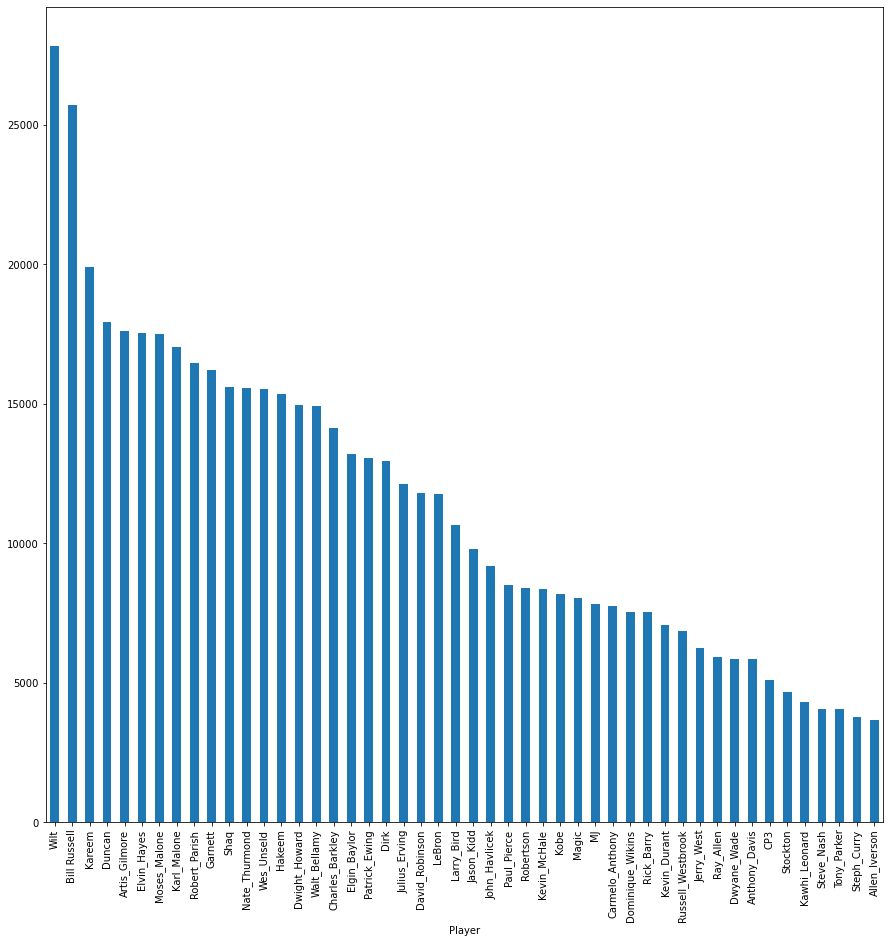

 1 - Wilt :  27837
 2 - Bill Russell :  25724
 3 - Kareem :  19921
 4 - Duncan :  17950
 5 - Artis_Gilmore :  17597
 6 - Elvin_Hayes :  17523
 7 - Moses_Malone :  17507
 8 - Karl_Malone :  17030
 9 - Robert_Parish :  16480
 10 - Garnett :  16196
 11 - Shaq :  15607
 12 - Nate_Thurmond :  15565
 13 - Wes_Unseld :  15546
 14 - Hakeem :  15369
 15 - Dwight_Howard :  14956
 16 - Walt_Bellamy :  14921
 17 - Charles_Barkley :  14128
 18 - Elgin_Baylor :  13187
 19 - Patrick_Ewing :  13042
 20 - Dirk :  12935
 21 - Julius_Erving :  12136
 22 - David_Robinson :  11798
 23 - LeBron :  11753
 24 - Larry_Bird :  10657
 25 - Jason_Kidd :  9783
 26 - John_Havlicek :  9193
 27 - Paul_Pierce :  8512
 28 - Robertson :  8382
 29 - Kevin_McHale :  8375
 30 - Kobe :  8166
 31 - Magic :  8024
 32 - MJ :  7824
 33 - Carmelo_Anthony :  7764
 34 - Dominique_Wikins :  7544
 35 - Rick_Barry :  7538
 36 - Kevin_Durant :  7063
 37 - Russell_Westbrook :  6872
 38 - Jerry_West :  6231
 39 - Ray_Allen :  5920
 40 -

In [16]:
total_rebounds = getTotalRebounds()
displayRebounds()

<h1> Operations : steals </h1>

In [17]:
def getTotalSteals():
    t = totals["Steals"].sort_values(ascending=False)
    plt.figure(figsize=[15,15])
    t.plot.bar()
    plt.show()
    return t

def displaySteals():
    ordered = totals.sort_values(by="Steals",ascending=False) 
    size = ordered.shape[0]
    for i in range(size):
        print(f' {i+1} - {ordered.index[i]} :  {ordered["Steals"][i]}')

<center class="alert alert-info">
    <h1> Stats: steals </h1>
</center>

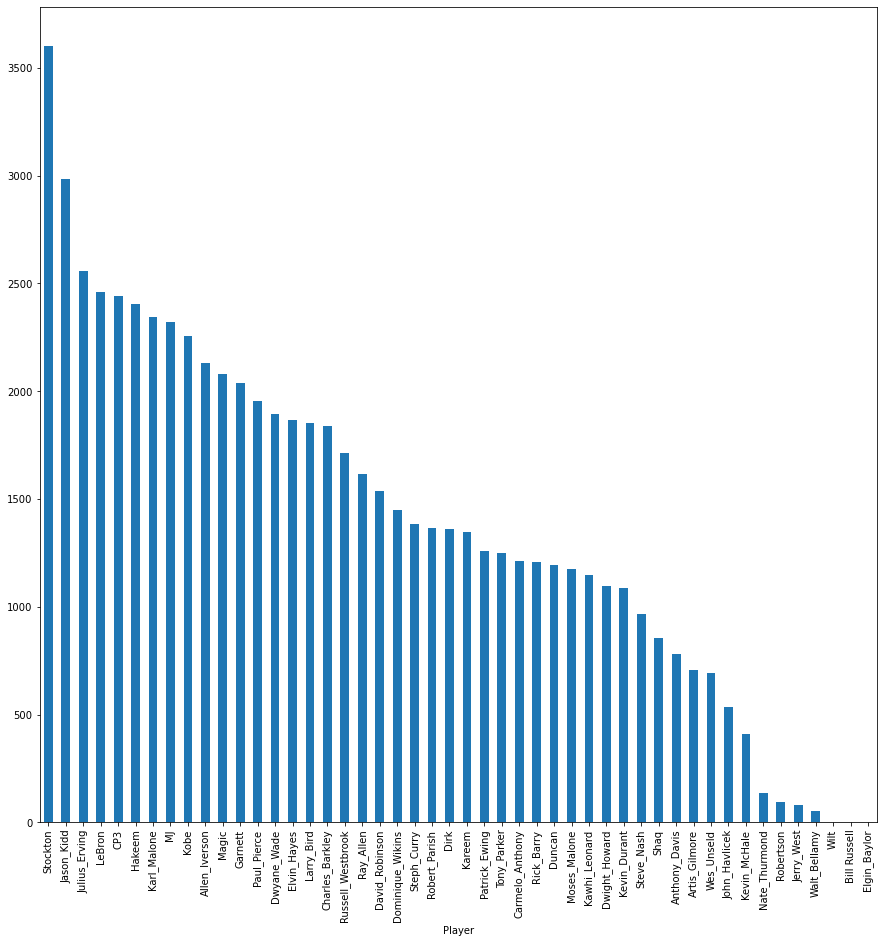

 1 - Stockton :  3603
 2 - Jason_Kidd :  2986
 3 - Julius_Erving :  2559
 4 - LeBron :  2460
 5 - CP3 :  2442
 6 - Hakeem :  2407
 7 - Karl_Malone :  2343
 8 - MJ :  2320
 9 - Kobe :  2254
 10 - Allen_Iverson :  2130
 11 - Magic :  2082
 12 - Garnett :  2037
 13 - Paul_Pierce :  1956
 14 - Dwyane_Wade :  1893
 15 - Elvin_Hayes :  1868
 16 - Larry_Bird :  1852
 17 - Charles_Barkley :  1841
 18 - Russell_Westbrook :  1714
 19 - Ray_Allen :  1615
 20 - David_Robinson :  1539
 21 - Dominique_Wikins :  1451
 22 - Steph_Curry :  1386
 23 - Robert_Parish :  1364
 24 - Dirk :  1359
 25 - Kareem :  1349
 26 - Patrick_Ewing :  1258
 27 - Tony_Parker :  1251
 28 - Carmelo_Anthony :  1214
 29 - Rick_Barry :  1210
 30 - Duncan :  1193
 31 - Moses_Malone :  1173
 32 - Kawhi_Leonard :  1149
 33 - Dwight_Howard :  1097
 34 - Kevin_Durant :  1087
 35 - Steve_Nash :  965
 36 - Shaq :  856
 37 - Anthony_Davis :  779
 38 - Artis_Gilmore :  708
 39 - Wes_Unseld :  695
 40 - John_Havlicek :  536
 41 - Kevin

In [18]:
total_steals = getTotalSteals()
displaySteals()

<h1> Operations : blocks </h1>

In [19]:
def getTotalBlocks():
    t = totals["Blocks"].sort_values(ascending=False)
    plt.figure(figsize=[15,15])
    t.plot.bar()
    plt.show()
    return t

def displayBlocks():
    ordered = totals.sort_values(by="Blocks",ascending=False) 
    size = ordered.shape[0]
    for i in range(size):
        print(f' {i+1} - {ordered.index[i]} :  {ordered["Blocks"][i]}')

<center class="alert alert-info">    
    <h1> Stats : blocks </h1>
</center>

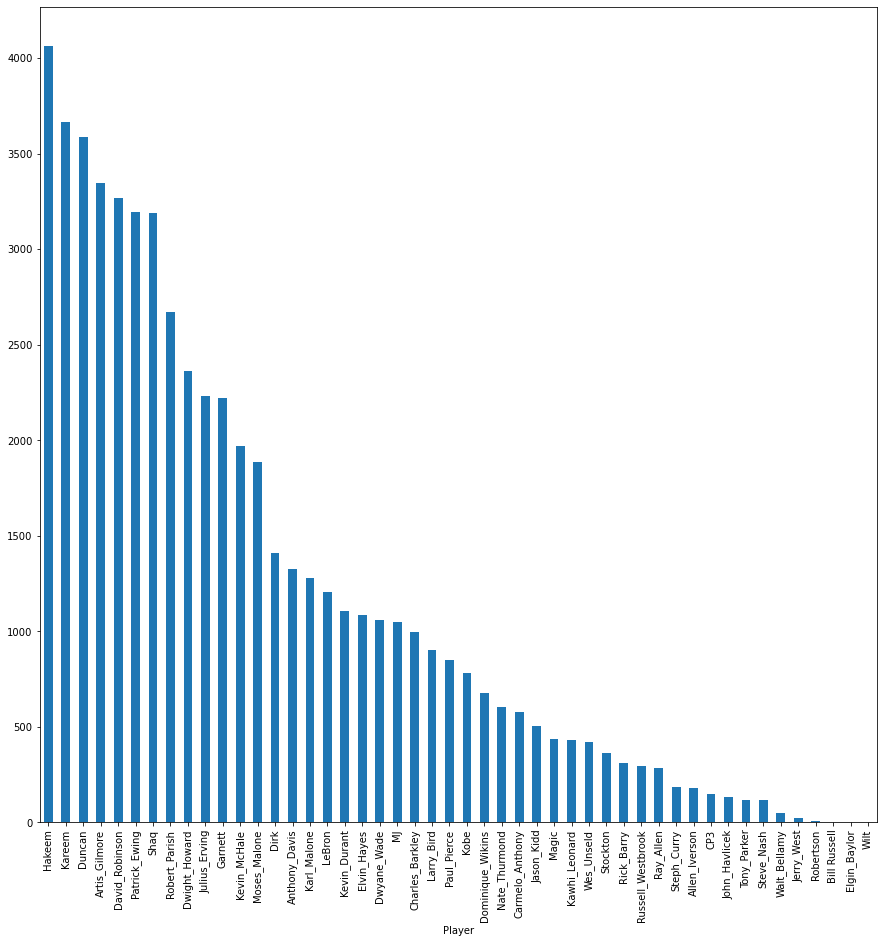

 1 - Hakeem :  4065
 2 - Kareem :  3665
 3 - Duncan :  3588
 4 - Artis_Gilmore :  3346
 5 - David_Robinson :  3266
 6 - Patrick_Ewing :  3197
 7 - Shaq :  3191
 8 - Robert_Parish :  2670
 9 - Dwight_Howard :  2361
 10 - Julius_Erving :  2234
 11 - Garnett :  2223
 12 - Kevin_McHale :  1971
 13 - Moses_Malone :  1884
 14 - Dirk :  1410
 15 - Anthony_Davis :  1327
 16 - Karl_Malone :  1280
 17 - LeBron :  1207
 18 - Kevin_Durant :  1104
 19 - Elvin_Hayes :  1086
 20 - Dwyane_Wade :  1060
 21 - MJ :  1051
 22 - Charles_Barkley :  996
 23 - Larry_Bird :  900
 24 - Paul_Pierce :  850
 25 - Kobe :  784
 26 - Dominique_Wikins :  677
 27 - Nate_Thurmond :  604
 28 - Carmelo_Anthony :  576
 29 - Jason_Kidd :  502
 30 - Magic :  438
 31 - Kawhi_Leonard :  429
 32 - Wes_Unseld :  422
 33 - Stockton :  365
 34 - Rick_Barry :  308
 35 - Russell_Westbrook :  295
 36 - Ray_Allen :  285
 37 - Steph_Curry :  186
 38 - Allen_Iverson :  178
 39 - CP3 :  149
 40 - John_Havlicek :  133
 41 - Tony_Parker : 

In [20]:
total_blocks = getTotalBlocks()
displayBlocks()

<h1> Operations: totals </h1>

In [21]:
def getTotalTotals():
    t = totals.sum(axis=1)
    t = t.sort_values(ascending=False)
    plt.figure(figsize=[15,15])
    t.plot.bar()
    plt.show()
    return t

def displayTotals():
    i = 0
    for element in total_totals.index:
        print(f"{i+1}-{element} : {total_totals[i]}")
        i+=1

<center class="alert alert-info">
    <h1> Stats: totals </h1>
</center>

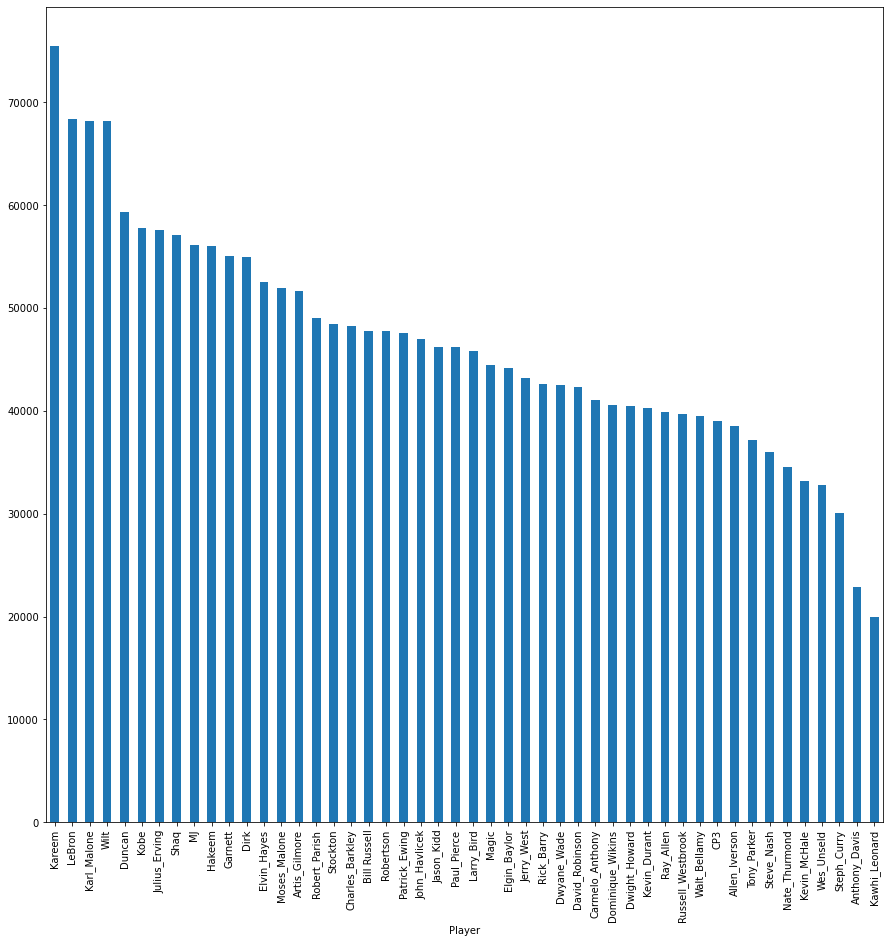

1-Kareem : 75516
2-LeBron : 68372
3-Karl_Malone : 68204
4-Wilt : 68184
5-Duncan : 59392
6-Kobe : 57835
7-Julius_Erving : 57555
8-Shaq : 57113
9-MJ : 56131
10-Hakeem : 56063
11-Garnett : 55048
12-Dirk : 54942
13-Elvin_Hayes : 52572
14-Moses_Malone : 51986
15-Artis_Gilmore : 51647
16-Robert_Parish : 49087
17-Stockton : 48420
18-Charles_Barkley : 48256
19-Bill Russell : 47794
20-Robertson : 47759
21-Patrick_Ewing : 47620
22-John_Havlicek : 46975
23-Jason_Kidd : 46198
24-Paul_Pierce : 46185
25-Larry_Bird : 45857
26-Magic : 44440
27-Elgin_Baylor : 44153
28-Jerry_West : 43193
29-Rick_Barry : 42616
30-Dwyane_Wade : 42506
31-David_Robinson : 42340
32-Carmelo_Anthony : 41064
33-Dominique_Wikins : 40586
34-Dwight_Howard : 40459
35-Kevin_Durant : 40283
36-Ray_Allen : 39886
37-Russell_Westbrook : 39731
38-Walt_Bellamy : 39497
39-CP3 : 38999
40-Allen_Iverson : 38504
41-Tony_Parker : 37128
42-Steve_Nash : 36001
43-Nate_Thurmond : 34515
44-Kevin_McHale : 33220
45-Wes_Unseld : 32827
46-Steph_Curry : 3

In [22]:
total_totals = getTotalTotals()
displayTotals()

<h1> Totals grouped by position </h1>

<h2> Guards </h2>

<h3> Operations </h3>

In [23]:
def TotalsByPosition_Guards():
    
    pg_totals = point_guards.sum(axis=1)
    sg_totals = shooting_guards.sum(axis=1)
    
    t = pg_totals.sort_values(ascending=False)
    
    plt.figure(figsize=[5,5])
    plt.title("Point guards")
    t.plot.bar()
    plt.show()
    
    ordered = pg_totals.sort_values(ascending=False) 
    size = ordered.shape[0]
    for i in range(size):
        print(f' {i+1} - {ordered.index[i]} :  {ordered.values[i]}')
        
    t = sg_totals.sort_values(ascending=False)
    
    plt.figure(figsize=[5,5])
    plt.title("Shooting guards")
    t.plot.bar()
    plt.show()
    
    ordered = sg_totals.sort_values(ascending=False) 
    size = ordered.shape[0]
    for i in range(size):
        print(f' {i+1} - {ordered.index[i]} :  {ordered.values[i]}')

<h3 class="alert alert-info"> Totals: guards </h3>

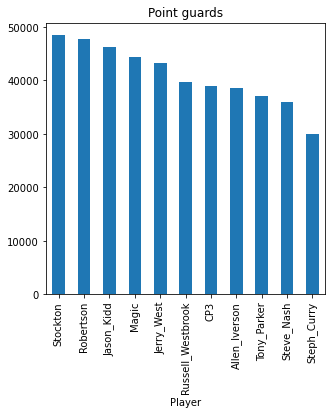

 1 - Stockton :  48420
 2 - Robertson :  47759
 3 - Jason_Kidd :  46198
 4 - Magic :  44440
 5 - Jerry_West :  43193
 6 - Russell_Westbrook :  39731
 7 - CP3 :  38999
 8 - Allen_Iverson :  38504
 9 - Tony_Parker :  37128
 10 - Steve_Nash :  36001
 11 - Steph_Curry :  30047


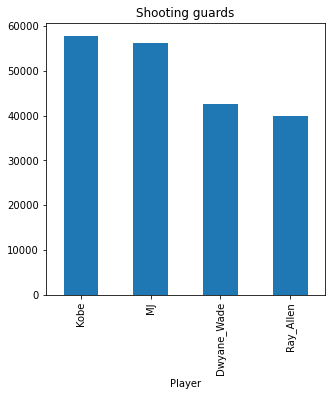

 1 - Kobe :  57835
 2 - MJ :  56131
 3 - Dwyane_Wade :  42506
 4 - Ray_Allen :  39886


In [24]:
TotalsByPosition_Guards()

<h2> Forwards </h2>

<h3> Operations </h3>

In [25]:
def TotalsByPosition_Forwards():
    
    sf_totals = small_forwards.sum(axis=1)
    pf_totals = power_forwards.sum(axis=1)
    
    t = sf_totals.sort_values(ascending=False)
    
    plt.figure(figsize=[5,5])
    plt.title("Small Forwards")
    t.plot.bar()
    plt.show()
    
    ordered = sf_totals.sort_values(ascending=False) 
    size = ordered.shape[0]
    for i in range(size):
        print(f' {i+1} - {ordered.index[i]} :  {ordered.values[i]}')

        
    t = pf_totals.sort_values(ascending=False)
    plt.figure(figsize=[5,5])
    plt.title("Power forwards")
    t.plot.bar()
    plt.show()
    
    ordered = pf_totals.sort_values(ascending=False) 
    size = ordered.shape[0]
    for i in range(size):
        print(f' {i+1} - {ordered.index[i]} :  {ordered.values[i]}')

<h3 class="alert alert-info"> Totals: forwards </h3>

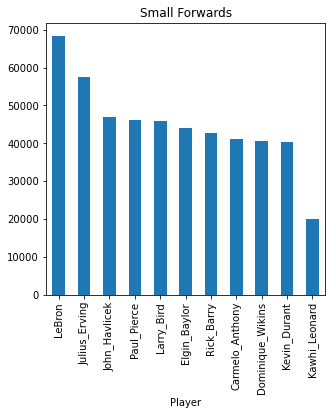

 1 - LeBron :  68372
 2 - Julius_Erving :  57555
 3 - John_Havlicek :  46975
 4 - Paul_Pierce :  46185
 5 - Larry_Bird :  45857
 6 - Elgin_Baylor :  44153
 7 - Rick_Barry :  42616
 8 - Carmelo_Anthony :  41064
 9 - Dominique_Wikins :  40586
 10 - Kevin_Durant :  40283
 11 - Kawhi_Leonard :  19970


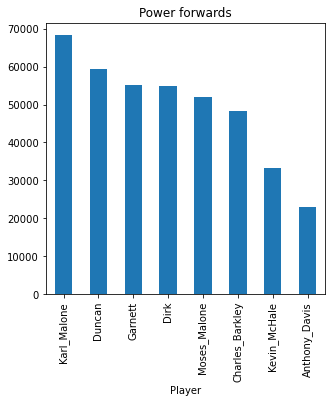

 1 - Karl_Malone :  68204
 2 - Duncan :  59392
 3 - Garnett :  55048
 4 - Dirk :  54942
 5 - Moses_Malone :  51986
 6 - Charles_Barkley :  48256
 7 - Kevin_McHale :  33220
 8 - Anthony_Davis :  22896


In [26]:
TotalsByPosition_Forwards()

<h2> Centers </h2>

<h3> Operations </h3>

In [27]:
def TotalsByPosition_Centers():
    
    c_totals = centers.sum(axis=1)
    
    t = c_totals.sort_values(ascending=False)
    
    plt.figure(figsize=[5,5])
    plt.title("Centers")
    t.plot.bar()
    plt.show()
    
    ordered = c_totals.sort_values(ascending=False) 
    size = ordered.shape[0]
    for i in range(size):
        print(f' {i+1} - {ordered.index[i]} :  {ordered.values[i]}')

<h3 class="alert alert-info"> Stats </h3>

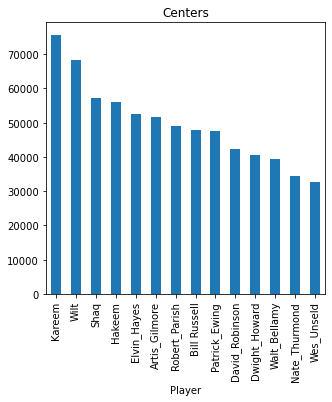

 1 - Kareem :  75516
 2 - Wilt :  68184
 3 - Shaq :  57113
 4 - Hakeem :  56063
 5 - Elvin_Hayes :  52572
 6 - Artis_Gilmore :  51647
 7 - Robert_Parish :  49087
 8 - Bill Russell :  47794
 9 - Patrick_Ewing :  47620
 10 - David_Robinson :  42340
 11 - Dwight_Howard :  40459
 12 - Walt_Bellamy :  39497
 13 - Nate_Thurmond :  34515
 14 - Wes_Unseld :  32827


In [28]:
TotalsByPosition_Centers()

<h1> Comparing two players </h1>

In [29]:
player_one = str(input("First player's name: "))

First player's name:  Kobe


In [30]:
player_two = str(input("Second player's name: "))

Second player's name:  Wilt


In [31]:
total_one = int(totals[totals.index==player_one].sum(axis=1))

In [32]:
total_two = int(totals[totals.index==player_two].sum(axis=1))

In [33]:
if total_one is not None and total_two is not None:
    if total_one > total_two:
        print(f"{player_one} has a higher total")
    else:
        print(f"{player_two} has a higher total")
else:
    print("Error!")

Wilt has a higher total
